In [1]:
import xarray as xr
import numpy as np

import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature


In [2]:
ds_ta = xr.open_dataset("data/airTemperature20001011.nc")
ds_ua = xr.open_dataset("data/windx20001011.nc")
ds_va = xr.open_dataset("data/windy20001011.nc")

In [3]:
ds_taSurface = ds_ta.isel(plev=0).ta

In [4]:
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()})
temperature_plot = ds_taSurface.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='coolwarm', cbar_kwargs={'label': 'Temperature (K)'})

contours = ax.contour(
    ds_taSurface['lon'],
    ds_taSurface['lat'], 
    ds_taSurface.values.squeeze(), 
    transform=ccrs.PlateCarree(), 
    colors='black', 
    linewidths=1, 
    levels=20
    )

ax.clabel(contours, inline=True, fontsize=8, fmt='%1.0f')

ax.coastlines()
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.set_extent([-30, 60, 30, 80], crs=ccrs.PlateCarree())
ax.set_title('Temperature at 1000hPa')
ax.set_aspect("auto")

In [ ]:
windspeed = np.sqrt(ds_ua.ua**2+ds_va.va**2)

In [ ]:
dataTempEurope = ds_ta.ta.isel(plev=1).sel(lon=slice(-30, 60), lat=slice(30,80))

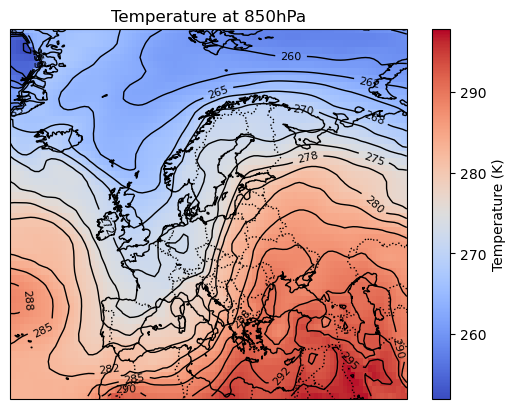

In [ ]:
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()})
temperature_plot = dataTempEurope.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='coolwarm', cbar_kwargs={'label': 'Temperature (K)'})

contours = ax.contour(dataTempEurope['lon'], dataTempEurope['lat'], dataTempEurope.values.squeeze(), transform=ccrs.PlateCarree(), colors='black', linewidths=1, levels=20)
ax.clabel(contours, inline=True, fontsize=8, fmt='%1.0f')

ax.coastlines()
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.set_extent([-30, 60, 30, 80], crs=ccrs.PlateCarree())
ax.set_title('Temperature at 850hPa')
ax.set_aspect("auto")

In [ ]:
data = windspeed.isel(plev=4).sel(time = "2000-10-11", lon=slice(-30, 60), lat=slice(30,80))

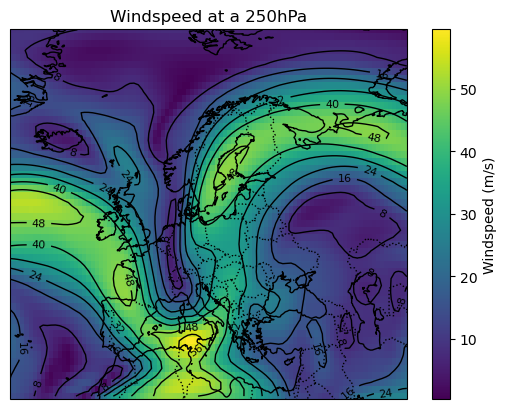

In [ ]:
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()})
windspeed_plot = data.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='viridis', cbar_kwargs={'label': 'Windspeed (m/s)'})

contours = ax.contour(data['lon'], data['lat'], data.values.squeeze(), transform=ccrs.PlateCarree(), colors='black', linewidths=1)
ax.clabel(contours, inline=True, fontsize=8, fmt='%1.0f')

ax.coastlines()
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.set_extent([-30, 60, 30, 80], crs=ccrs.PlateCarree())
ax.set_title('Windspeed at a 250hPa')
ax.set_aspect("auto")

In [ ]:
monthly_climatology = xr.open_dataset("data/monthly_climatology_ta.nc")
monthly_climatologyuA = xr.open_dataset("data/monthly_climatologyuA.nc")
monthly_climatologyvA = xr.open_dataset("data/monthly_climatologyvA.nc")

In [ ]:
ta_january = monthly_climatology.sel(month=[1,2,12]).mean("month").mean("lon").ta

`ta_january.diff("lat")` allows to look for regions where the temperature gradient in y direction is the largest. In addition, note that the temperature increases (decreases) on the left (right). If the temperature increase (decrease) is keeping the same sign with height the vertical wind shear will increase. If the sign flips the wind will decrease again.

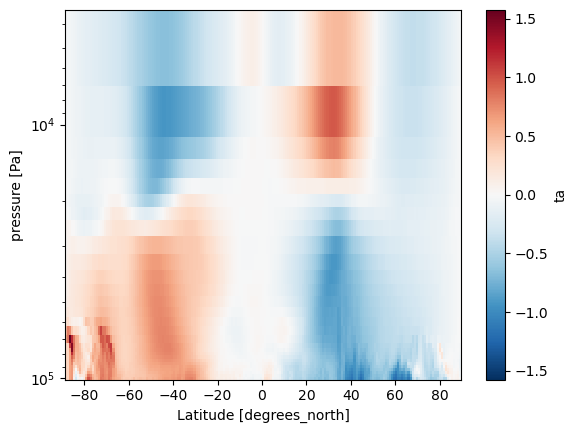

In [ ]:
ta_january.diff("lat").plot(cmap=plt.cm.RdBu_r, yincrease=False, yscale='log')

Text(0.5, 0, 'Latitude')

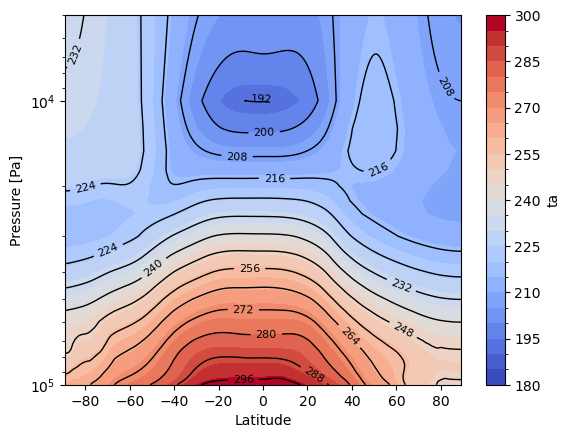

In [ ]:
fig, ax = plt.subplots()

cmap = plt.get_cmap("coolwarm")

cs = ta_january.plot.contourf(ax=ax, cmap=cmap, yincrease=False, yscale='log', levels=np.arange(180,305,5))

contours = ax.contour(ta_january['lat'], ta_january["plev"], ta_january.values.squeeze(), colors='black', linewidths=1, levels = 15)
ax.clabel(contours, inline=True, fontsize=8, fmt='%1.0f')

ax.set_ylabel("Pressure [Pa]")
ax.set_xlabel("Latitude")

In [ ]:
monthly_climatologyuADJF = monthly_climatologyuA.sel(month=[1,2,12]).mean("month").mean("lon").ua

Text(0.5, 0, 'Latitude')

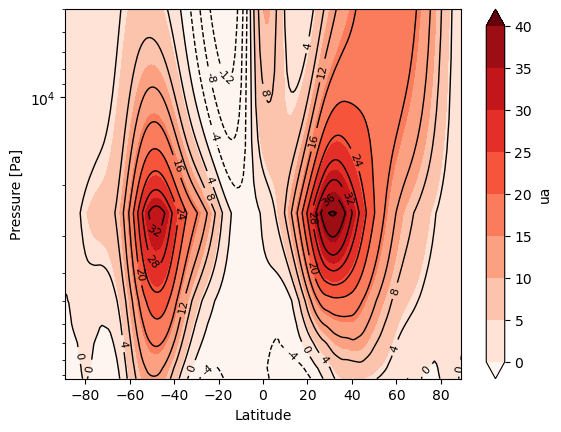

In [ ]:
fig, ax = plt.subplots()

cmap = plt.get_cmap("Reds")

cs = monthly_climatologyuADJF.plot.contourf(ax=ax, cmap=cmap, yincrease=False, yscale='log', levels=np.arange(0,45,5))

contours = ax.contour(monthly_climatologyuADJF['lat'], monthly_climatologyuADJF["plev"], monthly_climatologyuADJF.values.squeeze(), colors='black', linewidths=1, levels = 15)
ax.clabel(contours, inline=True, fontsize=8, fmt='%1.0f')

ax.set_ylabel("Pressure [Pa]")
ax.set_xlabel("Latitude")